In [35]:
import pandas as pd
import numpy as np
pd.set_option("mode.copy_on_write", True)
import seaborn as sns
import matplotlib.pyplot as plt
import os

import matplotlib.dates as mdates

base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = os.path.join(base_dir, "data", "coffee_sales.csv")
print(f"Project dir: {base_dir}")

Project dir: /Users/diegorodriguezescalona/Documents/Duke/Classes/3-Fall_2025/Data_Vizualization/memo_coffee


In [36]:
# Load Coffee Sales dataset
df = pd.read_csv(data_path)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


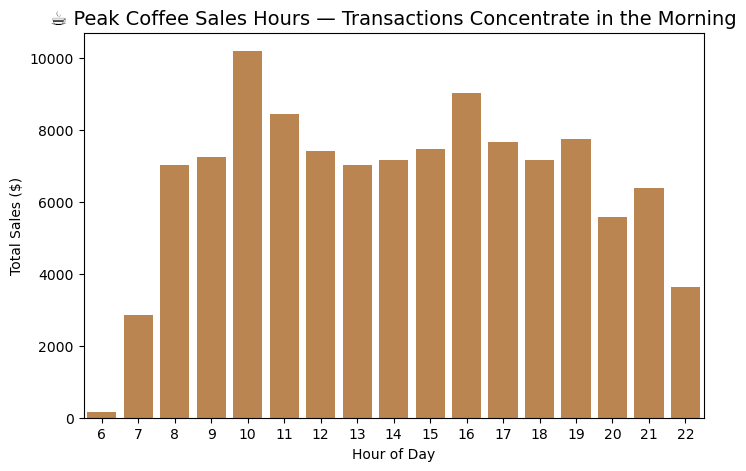

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="hour_of_day", 
    y="money", 
    estimator="sum", 
    errorbar=None,
    color="peru"
)
plt.title("☕ Peak Coffee Sales Hours — Transactions Concentrate in the Morning", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")

plt.show()

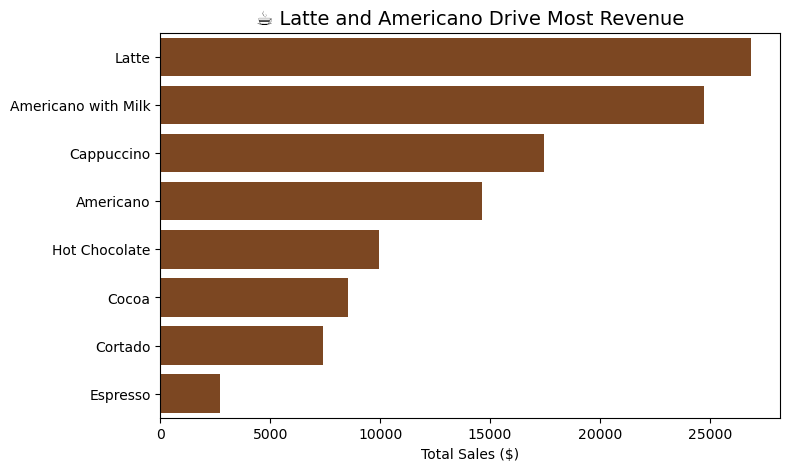

In [42]:
top = (
    df.groupby("coffee_name")["money"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=top, y="coffee_name", x="money", color="saddlebrown")
plt.title("☕ Latte and Americano Drive Most Revenue", fontsize=14)
plt.xlabel("Total Sales ($)")
plt.ylabel("")
plt.show()


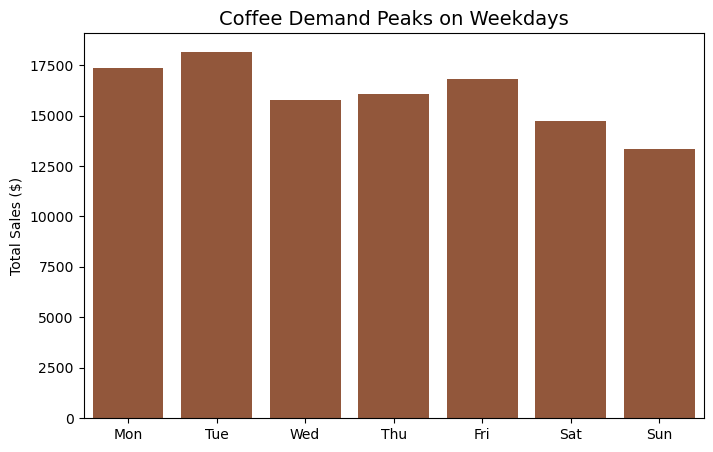

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Weekday", y="money", estimator="sum", errorbar=None,
            order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], color="sienna")
plt.title("Coffee sale per Weekday", fontsize=14)
plt.xlabel("")
plt.ylabel("Total Sales ($)")
plt.show()

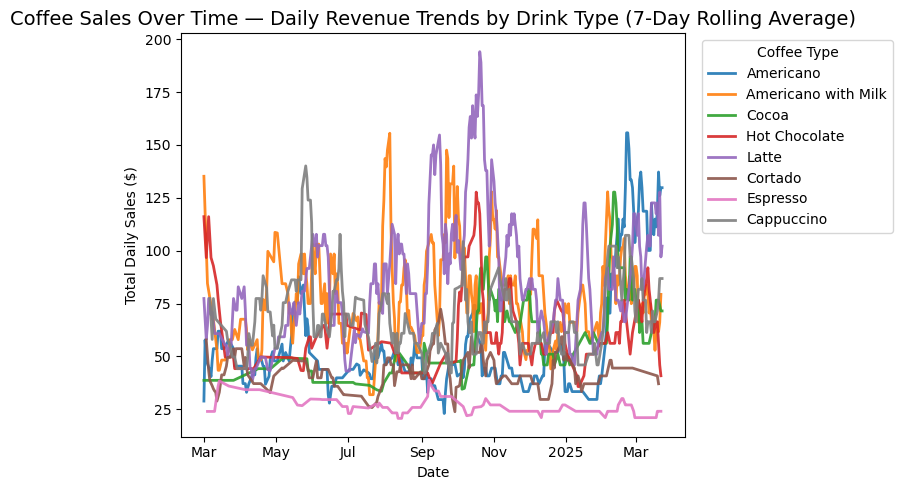

In [44]:
# Aggregate total sales per day and coffee type
daily_sales = (
    df.groupby(["Date", "coffee_name"], as_index=False)["money"]
    .sum()
    .sort_values("Date")
)

daily_sales["rolling"] = (
    daily_sales.groupby("coffee_name")["money"]
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

# Set up the figure
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(
    data=daily_sales,
    x="Date",
    y="rolling",
    hue="coffee_name",
    linewidth=2,
    alpha=0.9,
    ax=ax
)

# Clean x-axis: fewer ticks, readable labels
locator = mdates.AutoDateLocator(minticks=4, maxticks=8)
formatter = mdates.ConciseDateFormatter(locator)  # e.g., “Mar 2024”, “Apr”
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis="x", rotation=0)  # keep horizontal per your style guide

ax.set_title("Coffee Sales Over Time — Daily Revenue Trends by Drink Type (7-Day Rolling Average)", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Total Daily Sales ($)")
ax.legend(title="Coffee Type", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
plt.tight_layout()
plt.show()

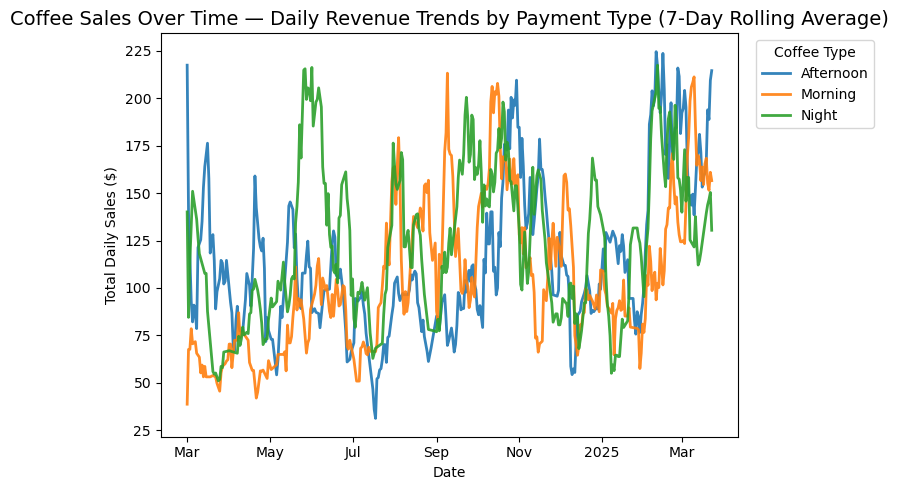

In [46]:
# Aggregate total sales per day and coffee type
daily_sales = (
    df.groupby(["Date", "Time_of_Day"], as_index=False)["money"]
    .sum()
    .sort_values("Date")
)

daily_sales["rolling"] = (
    daily_sales.groupby("Time_of_Day")["money"]
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

# Set up the figure
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(
    data=daily_sales,
    x="Date",
    y="rolling",
    hue="Time_of_Day",
    linewidth=2,
    alpha=0.9,
    ax=ax
)

# Clean x-axis: fewer ticks, readable labels
locator = mdates.AutoDateLocator(minticks=4, maxticks=8)
formatter = mdates.ConciseDateFormatter(locator)  # e.g., “Mar 2024”, “Apr”
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis="x", rotation=0)  # keep horizontal per your style guide

ax.set_title("Coffee Sales Over Time — Daily Revenue Trends by time of day (7-Day Rolling Average)", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Total Daily Sales ($)")
ax.legend(title="Time of day", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
plt.tight_layout()
plt.show()